In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [41]:
cancer = pd.read_csv("E:\PROGRAMMING\cancer.csv")
cancer.head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [42]:
cancer['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = cancer.drop(['Diagnosis'],axis=1)
Y = cancer['Diagnosis']              

In [45]:
Y.shape

(569,)

In [197]:
X_train, X_test, Y_train, Y_test =train_test_split (X ,Y, test_size=0.2, stratify=Y, random_state=0)

In [198]:
le = LabelEncoder()

In [50]:
le.fit(Y_train)   #we can fit and transform Y_train at the same time using le.fit_transform(Y_train)

LabelEncoder()

In [51]:
le.classes_

array(['B', 'M'], dtype=object)

In [98]:
y_transform = le.transform(Y_train)

In [54]:
Y_train

338    B
427    M
406    M
96     B
490    M
      ..
277    B
9      B
359    M
192    B
559    M
Name: Diagnosis, Length: 455, dtype: object

In [91]:
pd.Series(le.transform(Y_train))

0        0
1        4
2        6
3        4
4        2
        ..
10883    3
10884    0
10885    6
10886    3
10887    0
Length: 10888, dtype: int32

In [55]:
le.transform(Y_test)

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1])

# We do not use Label Encoder for categorical features since they will assign numerical values alphabetically and this will affect the model.

In [109]:
type(le.transform(Y_train))

numpy.ndarray

In [110]:
le.transform(Y_train).shape

(10888,)

In [112]:
le.transform(Y_train).ndim

1

In [117]:
cancer = pd.concat([cancer, pd.Dataframe(le.transform(Y_train))],axis=1)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [121]:
new_cancer = pd.concat([cancer, pd.Series(le.transform(Y_train))], axis=1)
new_cancer.head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst),0
0,8510426.0,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,8510653.0,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,4
2,8510824.0,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,6
3,854941.0,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,4
4,85713702.0,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,2


In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
sc = StandardScaler()

In [102]:
sc.fit_transform(X_train)

array([[ 0.28308025,  0.38124855,  0.22703982, ..., -0.25027971,
         0.3454678 ,  0.430822  ],
       [-0.34165413, -0.189674  ,  0.09080452, ..., -0.83398244,
        -1.35781702, -0.81935525],
       [-0.31534881, -0.34910111, -0.35185488, ...,  0.13496916,
         0.19874868,  0.35163748],
       ...,
       [-0.07008047, -0.06254978, -0.04908635, ..., -0.16575539,
         0.07188132, -0.13081203],
       [-0.85609553, -1.04821011, -0.94055738, ...,  0.5289295 ,
        -0.24818806,  0.83265613],
       [ 0.57953915,  0.84284501,  0.67618074, ..., -0.70502605,
        -0.19532991, -0.20203834]])

In [103]:
sc.transform(X_test)

array([[-0.53850446, -0.677636  , -0.64582668, ...,  0.4882776 ,
         0.33134774,  0.40555578],
       [-0.820323  , -1.0086989 , -0.93526542, ...,  0.63801822,
        -0.03590556,  0.56687887],
       [-0.50425345, -0.63266522, -0.58014885, ...,  0.36736077,
         0.22665546,  0.81595354],
       ...,
       [-0.40170329, -0.55348973, -0.78871243, ...,  1.42581492,
         1.82714139,  0.70203794],
       [ 0.12592458,  0.36820494,  0.04210192, ..., -0.07261007,
         0.46606749,  0.64729925],
       [-0.5893569 , -0.717291  , -0.70454367, ...,  0.54482263,
         0.31352163,  0.65856913]])

# Our target variable here is not categorical but numerical hence we need not label encode

In [58]:
diabetes = pd.read_csv("E:\PROGRAMMING\diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Our target variable is already encode so to speak no need to label encode

In [60]:
iris = pd.read_csv("E:\PROGRAMMING\iris.csv")
iris.head()

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
iris['Species'].value_counts() 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [62]:
X = iris.drop(['Species'], axis=1)
Y = iris['Species']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [65]:
le_1 = LabelEncoder()

In [66]:
Y_train_enc = le.fit_transform(Y_train)

In [96]:
Y_train_le = le.fit_transform(Y_train)
new_iris = pd.concat(le.fit_transform(Y_train))

AttributeError: 'DataFrame' object has no attribute 'concat'

In [67]:
Y_train_enc.shape

(120,)

In [69]:
Y_test

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
Name: Species, dtype: object

In [68]:
le.transform(Y_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [70]:
pd.Series(le.transform(Y_test))

0     2
1     1
2     0
3     2
4     0
5     2
6     0
7     1
8     1
9     1
10    2
11    1
12    1
13    1
14    1
15    0
16    1
17    1
18    0
19    0
20    2
21    1
22    0
23    0
24    2
25    0
26    0
27    1
28    1
29    0
dtype: int32

You realize above that the numericals have been assigned in alphabetical order

In [71]:
paris = pd.read_csv("E:\PROGRAMMING\ParisHousing.csv")
paris.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


Price is numerical no need to encode

In [72]:
wine= pd.read_csv("E:\PROGRAMMING\winequalityN.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [73]:
wine['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [74]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# Our target variable here is wine quality since whether re or white you can still jave varying qualities. Threfore our aim is to determine whether either of our red or white wine is of high or low quality. We will therefore not need to encode since our target variable is already numerical.

In [77]:
beans = pd.read_csv("E:\PROGRAMMING\Dry_Bean_Dataset.csv")
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [87]:
beans['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [88]:
beans['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [89]:
beans['Class'].nunique()

7

In [78]:
X = beans.drop(['Class'], axis=1)
Y = beans['Class']

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [80]:
le = LabelEncoder()

In [86]:
Y_train

2301     BARBUNYA
5659        HOROZ
8597         SIRA
6157        HOROZ
4544         CALI
           ...   
13123    DERMASON
3264     BARBUNYA
9845         SIRA
10799    DERMASON
2732     BARBUNYA
Name: Class, Length: 10888, dtype: object

In [81]:
Y_train_enc = le.fit_transform(Y_train)

In [85]:
pd.Series(le.fit_transform(Y_train))

0        0
1        4
2        6
3        4
4        2
        ..
10883    3
10884    0
10885    6
10886    3
10887    0
Length: 10888, dtype: int32

In [82]:
le.transform(Y_test)

array([3, 3, 3, ..., 5, 0, 3])

In [122]:
titanic = pd.read_csv("E:\PROGRAMMING\Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [127]:
missing_data = pd.DataFrame({'total_missing': titanic.isnull().sum(), 'perc_missing': (titanic.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [135]:
print(titanic['Pclass'].nunique(), titanic['Cabin'].nunique(), titanic['Embarked'].nunique(), titanic['Parch'].nunique())

3 147 3 7


In [136]:
print('Pclass' : titanic['Pclass'].nunique()
     'Cabin' : titanic['Cabin'].nunique()
     'Embarked' : titanic['Embarked'].nunique()
     'Parch' : titanic['Parch'].nunique())

SyntaxError: invalid syntax (152896805.py, line 1)

In [133]:
titanic['Embarked'].nunique()

3

In [134]:
titanic['Parch'].nunique()

7

In [137]:
heart = pd.read_csv("E:\PROGRAMMING\heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [138]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [139]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [194]:
cate_val = []
cont_val = []


for column in heart.columns:
    if heart[column].nunique()  <=10:
        cate_val.append(column)
        
    else:
        cont_val.append(column)   
        

In [195]:
cate_val

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [196]:
cont_val

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [141]:
heart['Sex'].nunique()

2

In [142]:
heart['ChestPainType'].nunique()

4

In [144]:
heart['RestingECG'].nunique()

3

In [145]:
heart['ExerciseAngina'].nunique()

2

In [146]:
heart['ST_Slope'].nunique()

3

In [172]:
X = heart.drop(['HeartDisease'], axis=1)
Y = heart['HeartDisease']

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify= Y, random_state=2)

In [174]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [188]:
oe.fit_transform(X_train)

array([[20.,  1.,  2., ...,  0., 29.,  1.],
       [15.,  1.,  1., ...,  0., 19.,  1.],
       [22.,  1.,  0., ...,  1., 46.,  1.],
       ...,
       [14.,  1.,  0., ...,  0., 24.,  0.],
       [33.,  1.,  2., ...,  0., 27.,  1.],
       [21.,  1.,  0., ...,  1., 20.,  1.]])

In [176]:
transform = oe.fit_transform(X_train)

In [177]:
pd.Dataframe(transform)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [178]:
oe.transform(X_test)

ValueError: Found unknown categories [30] in column 0 during transform

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [180]:
import seaborn as sns

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

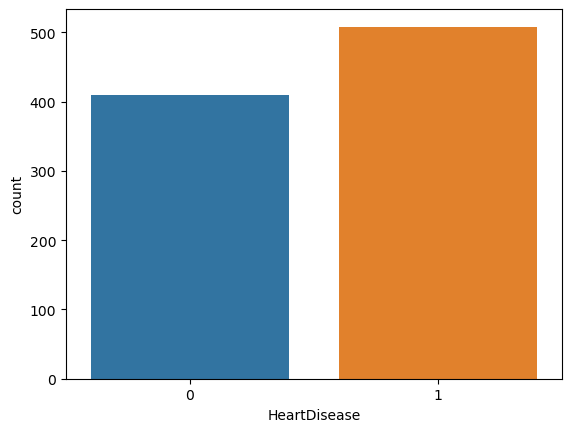

In [181]:
sns.countplot(x = 'HeartDisease', data = heart)

In [182]:
heart['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [189]:
heart.duplicated().any()

False

In [184]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [185]:
heart['Cholesterol'].mean()

198.7995642701525